# Lecture 1

## Outline

> **1. Get Financial Data**
> * Introduction to financial datasets
> * Get data from yahoo finance

> **2. Statistical excursion on returns**
> * The normal distribution and density.
> * Compute and plot returns
> * Higher moments. Skewness, kurtosis.

> **3. Firm size**
> * Definition and computation.
> * The lognormal distribution
> * Defining small firm

> **4. Inequality in stock market value.**
> * Visual representation
> * Gini coefficient intuition.

> **5. Predictability.**
> * Simple AR Model

## Get Financial Data

> Popular Online Public Financial Datasets
> * Yahoo Finance: The most widely used financial dataset. https://finance.yahoo.com/
> * Fred: U.S. Economic data. https://fred.stlouisfed.org/
> * World Bank: World Wide Economic data. https://data.worldbank.org/


> For low frequency data, we will mainly use the Yahoo finance dataset. \
> We are going to learn: 
> * How to fetch stock data from Yahoo finance 
> * The data structure of the Yahoo finance data

> We will use the library "datareader". Make sure you have installed it before you start it.

In [1]:
!pip3 install pandas_datareader

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [2]:
import pandas_datareader.data as web 
import pandas as pd
import datetime as dt
import numpy as np

# Query SPY data from Yahoo Finance and have a look
SPXdata = web.DataReader("^GSPC", "yahoo", start="2000-01-01", end='2022-02-24')
SPXdata.tail()
SPXdata.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,1478.000000,1438.359985,1469.250000,1455.219971,931800000,1455.219971
2000-01-04,1455.219971,1397.430054,1455.219971,1399.420044,1009000000,1399.420044
2000-01-05,1413.270020,1377.680054,1399.420044,1402.109985,1085500000,1402.109985
2000-01-06,1411.900024,1392.099976,1402.109985,1403.449951,1092300000,1403.449951
2000-01-07,1441.469971,1400.729980,1403.449951,1441.469971,1225200000,1441.469971


> Yahoo Finance API returns a Date Index column and six other data columns. For convenience, we will only use Date Index and Adj Close for each symbol. Now we want more than SPY. We are going to build our own dataset with Yahoo Finance API. 

In [18]:
# Create a dictionary that stores symbols we need. 
# To find the symbol name for a company, you can go the Yahoo Finane website and search the company name.

symbol_dict = {"S&P500": "^GSPC","SP500ETF":"SPY", "Google":"GOOG", 
                "Apple": "AAPL", "Amazon": "AMZN",
                "Microsoft": "MSFT", "GeneralMotors": "GM","Facebook":"FB"}

df_constructed = pd.DataFrame({})
start_date = "2000-01-01"
end_date = "2022-02-24"

for company_name, symbol in symbol_dict.items():
    print("Query the stock {} data".format(company_name))
    df_tmp = web.DataReader(symbol, "yahoo", start=start_date, end=end_date)
    df_constructed[symbol] = df_tmp['Adj Close']

df_constructed.head()

Query the stock S&P500 data
Query the stock SP500ETF data
Query the stock Google data
Query the stock Apple data
Query the stock Amazon data
Query the stock Microsoft data
Query the stock GeneralMotors data
Query the stock Facebook data


,^GSPC,SPY,GOOG,AAPL,AMZN,MSFT,GM,FB
Date,,,,,,,,
2000-01-03,1455.219971,96.555061,NaN,0.855797,89.3750,36.827526,NaN,NaN
2000-01-04,1399.420044,92.779198,NaN,0.783644,81.9375,35.583492,NaN,NaN
2000-01-05,1402.109985,92.945160,NaN,0.795112,69.7500,35.958660,NaN,NaN
2000-01-06,1403.449951,91.451401,NaN,0.726304,65.5625,34.754112,NaN,NaN
2000-01-07,1441.469971,96.762520,NaN,0.760708,69.5625,35.208313,NaN,NaN


> You notice that there are several NaN in the column GOOG. Don't worry. That is because google did not go public before that date. Actually, from the following plot, we know that google actually went public after 2004. We will deal with these missing values later. 

## Statistical excursion on returns

### Normal Distributions and Density

In [19]:
!pip3 install seaborn

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


Kurtosis of Simulations -0.0140
Skewness of Simulations 0.0177


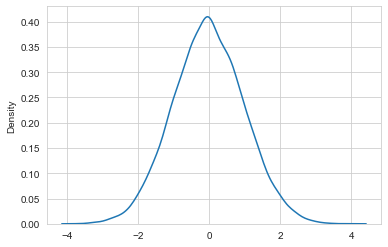

In [20]:
from scipy.stats import norm
import seaborn as sns
from scipy.stats import kurtosis, skew

rvs = norm(0,1).rvs(10000)
sns.set_style("whitegrid")
sns.kdeplot(rvs)

print("Kurtosis of Simulations {:.4f}".format(kurtosis(rvs)))
print("Skewness of Simulations {:.4f}".format(skew(rvs)))


### Compute and plot returns

In [21]:
logReturns = pd.DataFrame(index=df_constructed.index[1:])

for company_name, symbol in symbol_dict.items():
    r_tmp = np.diff(np.log(df_constructed[symbol]))
    logReturns[symbol] = r_tmp

logReturns.head()

,^GSPC,SPY,GOOG,AAPL,AMZN,MSFT,GM,FB
Date,,,,,,,,
2000-01-04,-0.039099,-0.039891,NaN,-0.088078,-0.086884,-0.034364,NaN,NaN
2000-01-05,0.001920,0.001787,NaN,0.014527,-0.161039,0.010488,NaN,NaN
2000-01-06,0.000955,-0.016202,NaN,-0.090514,-0.061914,-0.034072,NaN,NaN
2000-01-07,0.026730,0.056452,NaN,0.046281,0.059222,0.012984,NaN,NaN
2000-01-10,0.011128,0.003425,NaN,-0.017745,-0.005405,0.007264,NaN,NaN


[]

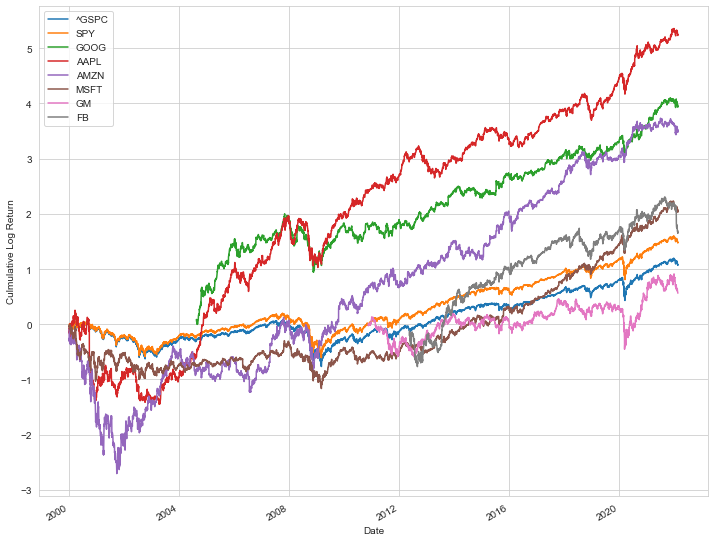

In [22]:
import matplotlib.pyplot as plt
cum_Returns = (logReturns).cumsum()
fig, ax = plt.subplots(figsize=(12,10))
ax.set_ylabel("Culmulative Log Return")
cum_Returns.plot(ax=ax)
plt.plot()

### Higher moments. Skewness, kurtosis.

<AxesSubplot:ylabel='Density'>

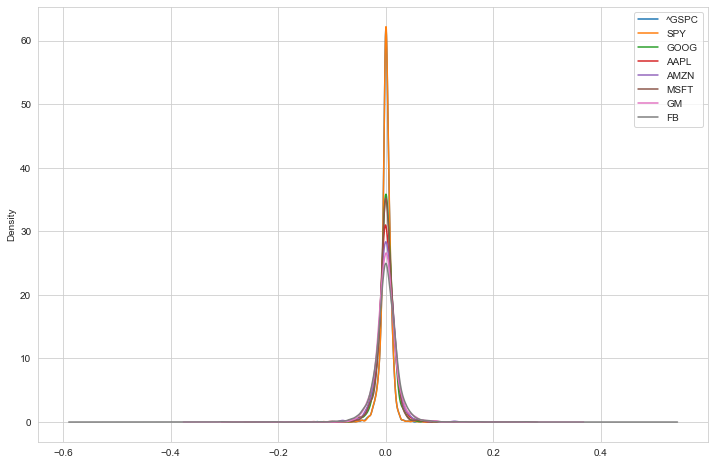

In [23]:
fig, ax = plt.subplots(figsize=(12,8))
logReturns.dropna(inplace=True)
logReturns.plot.kde(ax=ax)

In [24]:
from scipy.stats import kurtosis, skew
for i in range(len(logReturns.columns)):
    print("Stock {}, Kurtosis: {}, Skewness: {}".format(logReturns.columns[i], 
                                                        kurtosis(logReturns)[i], 
                                                        skew(logReturns)[i]))

Stock ^GSPC, Kurtosis: 21.127798887887813, Skewness: -0.9856901636798581
Stock SPY, Kurtosis: 18.454162196063557, Skewness: -0.980392820986304
Stock GOOG, Kurtosis: 9.552562884957684, Skewness: 0.36197807947421073
Stock AAPL, Kurtosis: 6.824013072652544, Skewness: -0.3906007321484684
Stock AMZN, Kurtosis: 6.811640904372423, Skewness: 0.21119931511997947
Stock MSFT, Kurtosis: 10.849388592597444, Skewness: -0.2972621802412046
Stock GM, Kurtosis: 10.09021031991146, Skewness: -0.13420130638623798
Stock FB, Kurtosis: 23.342960097501432, Skewness: -0.5778388936604326


> Build a portfolio using GOOG, AAPL, AMZN, MSFT, GM.
> Invest equally to each.

In [40]:
rPortfolio = logReturns[["GOOG", "AAPL", "AMZN", "MSFT", "GM"]].mean(axis=1)
print("Kurtosis of the Portfolio {:.4f}".format(kurtosis(rPortfolio)))
print("Skewness of the Portfolio {:.4f}".format(skew(rPortfolio)))

Kurtosis of the Portfolio 8.6990
Skewness of the Portfolio -0.4803


### Return Behaviors Over Time

> Do properties of returns of GM change over time?

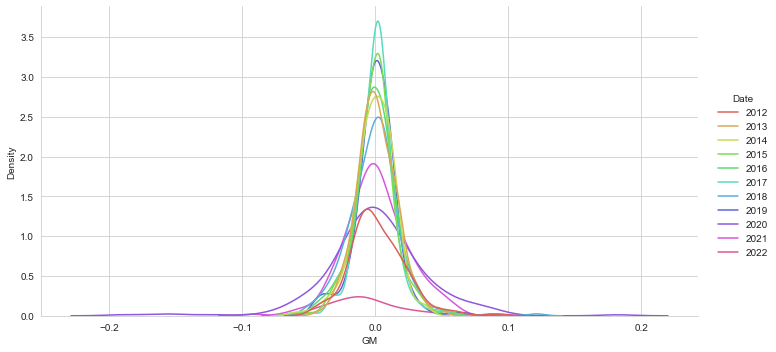

In [34]:
GMLogReturns = logReturns["GM"].dropna()
n = len(np.unique(GMLogReturns.index.year))
pl = sns.color_palette("hls",n)
sns.displot(x=GMLogReturns, kind="kde", hue=GMLogReturns.index.year, aspect=2, palette=pl)

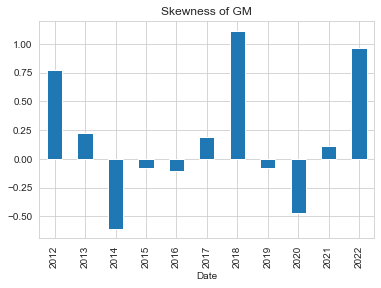

In [35]:
GMLogReturns.groupby(GMLogReturns.index.year).skew().plot(kind='bar')
plt.title("Skewness of GM")
plt.show()

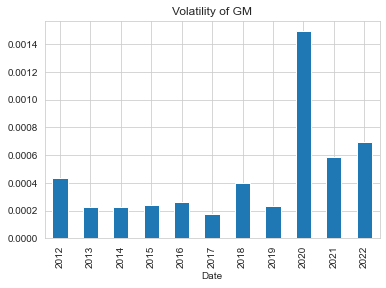

In [36]:
GMLogReturns.groupby(GMLogReturns.index.year).var().plot(kind='bar')
plt.title("Volatility of GM")
plt.show()

### Practice: Change GM to FB

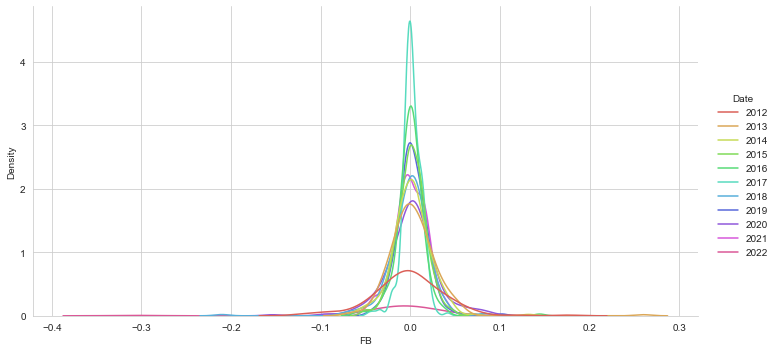

In [44]:
FBLogReturns = logReturns["FB"].dropna()
n = len(np.unique(FBLogReturns.index.year))
pl = sns.color_palette("hls",n)
sns.displot(x=FBLogReturns, kind="kde", hue=FBLogReturns.index.year, aspect=2, palette=pl)

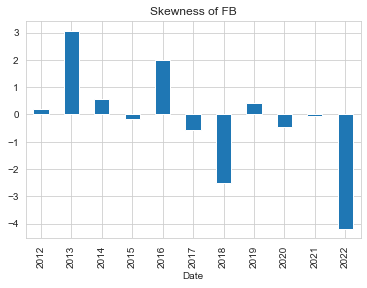

In [45]:
FBLogReturns.groupby(FBLogReturns.index.year).skew().plot(kind='bar')
plt.title("Skewness of FB")
plt.show()

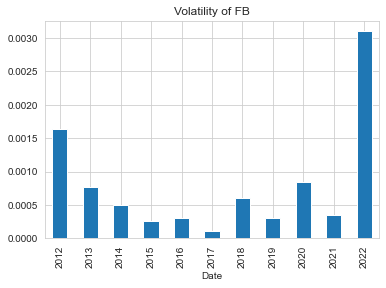

In [46]:
FBLogReturns.groupby(FBLogReturns.index.year).var().plot(kind='bar')
plt.title("Volatility of FB")
plt.show()

## Firmsize

### Get and Visualize Firm Size Data

In [ ]:
crsp500 = pd.read_csv("../Data/CRSP_daily500.csv",index_col=0).reset_index(drop=True)

In [ ]:
crsp500["MarketCap"] = crsp500["PRC"] * crsp500["SHROUT"]
last_date = crsp500["date"].max()
capdata = crsp500[crsp500["date"]==last_date][["MarketCap", "TICKER"]]
capdata = capdata.reset_index(drop=True)
capdata["logCap"] = np.log(capdata["MarketCap"])
sns.kdeplot(data=capdata, x="logCap")

In [ ]:
# Compute deciles
q10, q25, q50, q75 = capdata["MarketCap"].quantile([0.9, 0.75, 0.5,0.25]).values

def group_cap(x):
    g = 1
    if x >= q10:
        g = 0.1
    elif x >= q25:
        g = 0.25
    elif x >= q50:
        g = 0.5
    elif x >= q75:
        g = 0.75
    return g

capdata["percentile"] = capdata["MarketCap"].apply(group_cap)

In [ ]:
percentile_grouped = capdata.groupby("percentile").sum("MarketCap")/capdata["MarketCap"].sum()
percentile_grouped = percentile_grouped.cumsum()[["MarketCap"]]
percentile_grouped

In [ ]:
# Top Five Companies
top10 = capdata.sort_values("MarketCap", ascending=False)[:10]
top10

In [ ]:
print("Top10 Companies account for {:.2f}% of MarketCap in SP500"
      .format(100*top10["MarketCap"].sum()/capdata["MarketCap"].sum()))

In [ ]:
percentile_grouped.plot()
plt.title("Percentile VS MarketCap Ratio")

### Gini coefficient intuition.

In [ ]:
def Gini(MV):
    MV = np.sort(MV)
    n = len(MV)
    ns = np.arange(1,n+1)
    numerator = 2*np.sum(ns*MV)
    denominator = n*MV.sum()
    return numerator/denominator - (n+1)/n


In [ ]:
Gini(capdata["MarketCap"])

## Predictability

In [ ]:
SPY = df_constructed["SPY"]
SPY_monthly = SPY.resample("1M").last()
fig, ax = plt.subplots(figsize=(8,6))
SPY_inSample = SPY_monthly[:-3]
SPY_outSample = SPY_monthly[-3:]
ax.plot(SPY_inSample)
ax.plot(SPY_outSample)

In [ ]:
SPY_monthlyR = np.diff(np.log(SPY_monthly))
insampleR = SPY_monthlyR[:-3]
outsampleR = SPY_monthlyR[-3:]

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.ar_model import AutoReg
plot_pacf(insampleR)
plt.show()

In [ ]:
ar_model = AutoReg(insampleR, lags=1).fit()
predR = ar_model.predict(start=len(insampleR), end=(len(insampleR)+len(outsampleR)-1), dynamic=True)
print(ar_model.summary())

In [ ]:
predR

In [ ]:
outsampleR